# Heart Failure Analysis
## By Ruben
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story behind The Data

Cardiovascular diseases (CVDs) are the number 1 cause of death all over the world, taking an estimated **17.9** million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure, as well as analyze and understand the main factor for these diseases.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with CV disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a great analysis of it can be of great help.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce6b2bae3ed7c4544a01b)**

# Data Description
In this task, few datasets are provided:

1. **`base_metrics_patient.csv`** - the base DF which contains the main metrics measured per each patient, these are:
 
	- `uniqueID` - patient ID
	- `smoking` - If the patient smokes or not (boolean)
    - `ejection_fraction` - Percentage of blood leaving the heart at each contraction (%)
	- `serum_sodium` - Level of serum sodium in the blood (mEq/L)
	- `platelets` - Platelets in the blood (kiloplatelets/mL)
	- `creatinine_phosphokinase` - Level of the CPK enzyme in the blood (mcg/L)
	- `diabetes` - If the patient has diabetes (boolean)
	- `serum_creatinine` - Level of serum creatinine in the blood (mg/dL)
2. **`blood_metrics_df.csv`** - an additional dataset contains some more metrics about each patient. Specifically, it contains:
    - `uniqueID` - patient ID
    - `anaemia` - Decrease of red blood cells or hemoglobin (boolean)
    - `high_blood_pressure` - If the patient has hypertension (boolean)
3. **`demographic_data_health.csv`** - some extra data about the patient’s demographics, specifically:
    - `uniqueID` - patient ID
    - `age` - patient’s age
    - `sex` - (male - 1, female - 0)
4. **`follow_up_df.csv` -** a dataset contains details about a follow up check that was with that patient. It contains:
    - `uniqueID` - patient ID
    - `time` - time passed (in days) between the measurement date (see dataset #1) until that “follow up” date
    - `DEATH_EVENT` - If the patient deceased during the follow-up period (boolean)

# SQL tasks

1. How many death cases do we have in this dataset?
2. Per each sex (M, F), show the amount of “death” records in the data
3. Calculate the following statistics for serum_creatinine, per each anaemia category -
    1. min, max, average, range
4. Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our dataset?**  
5. Per each gender + smoker category, find out the min, max and mean of creatinine_phosphokinase
6. Let’s define a new variable called age_group:
    1. 10 < x ≤ 50
    2. 50 < x ≤ 70
    3. 70 < x ≤ 80
    4. 80 < x ≤ 120
    
    Per each age_group, find out:
    
    - Out of persons in each group, what’s the % of smokers are there. Make sure to round the answer up to 4 decimal points
    - how many patients with high_blood_pressure out there
    - what is the avg. level of serum_sodium. Make sure to round the answer up to 4 decimal points
7. Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest serum_creatinine. Help them find that information. Meaning - for each age_group, who are the top 10 patient IDs with the highest serum_creatinine?

8. Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom 5 patient IDs, with the lowest level of “general_serum”

In [83]:
-- Start writing your SQL query here 

SELECT * from base_metrics_patient LIMIT 10;

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueid,diabetes,serum_creatinine,almost_outlier
0,1,45,139,362000,129,159,0,1.1,False
1,0,60,140,304000,68,87,1,0.8,False
2,0,40,139,235000,84,88,1,0.7,False
3,0,25,144,181000,115,89,0,1.1,False
4,1,45,136,249000,66,90,1,0.8,False
5,1,35,136,255000,90,242,0,1.1,False
6,0,40,141,220000,1185,243,0,0.9,False
7,0,35,139,133000,320,291,0,1.4,False
8,0,30,132,329000,482,142,1,0.9,False
9,0,40,141,229000,84,143,0,0.9,False


In [84]:
SELECT * from blood_metrics_df LIMIT 10;

,uniqueid,anaemia,high_blood_pressure
0,0,0,1
1,1,0,0
2,2,0,0
3,3,1,0
4,4,1,0
5,5,1,1
6,6,1,0
7,7,1,0
8,8,0,0
9,9,1,1


In [85]:
SELECT * from demographic_data LIMIT 10;

,uniqueid,age,sex,age_group
0,127,58,0,50 - 70
1,128,61,1,50 - 70
2,129,53,1,50 - 70
3,130,53,1,50 - 70
4,131,60,1,50 - 70
5,132,46,0,10 - 50
6,133,63,1,50 - 70
7,134,81,1,80 - 120
8,135,75,1,70 - 80
9,136,65,0,50 - 70


In [86]:
SELECT * from follow_up_df LIMIT 10;

,uniqueid,time,death_event
0,0,4,1
1,1,6,1
2,2,7,1
3,3,7,1
4,4,8,1
5,5,8,1
6,6,10,1
7,7,10,1
8,8,10,1
9,9,10,1


# Important notice

I assumed that 1 **always** represents 'yes' and/or 'true'.

# SQL task 1 - Question
How many death cases do we have in this dataset?

## SQL task 1 - Answer
96 out of 299 patients passed away during the follow-up period.

In [87]:
SELECT
    SUM (CASE WHEN death_event = 1 THEN 1 END) as death_event_count,
    COUNT(*) as total_observations
FROM follow_up_df;

,death_event_count,total_observations
0,96,299


# SQL task 2 - Question
Per each sex (M, F), show the amount of “death” records in the data.

## SQL task 2 - Answer
Of the 96 deaths (see task 1), 34 are female (0=F), 64 are male (1=M).

In [88]:
SELECT
    d.sex,
    SUM(f.death_event) as death_event_count,
    COUNT(*) as total_observations
FROM
    demographic_data AS d
JOIN 
    follow_up_df AS f
ON
    d.uniqueid = f.uniqueid
GROUP BY d.sex;

,sex,death_event_count,total_observations
0,0,34,105
1,1,62,194


# SQL task 3 - Question
Calculate the following statistics for serum_creatinine, per each anaemia category - Min, Max, Average, Range.

## SQL task 3 - Answer
See table below for statistics. In summary, serum creatinine is elevated in anemic patients. The reason behind this is that less red blood cells (anemia) results in reduced oxygen transport and subsequent muscle breakdown (due to anearobic metabolism), which increases serum creatinine levels.

In [89]:
SELECT
    b.anaemia,
    MIN(p.serum_creatinine),
    MAX(p.serum_creatinine),
    AVG(p.serum_creatinine),
    MAX(p.serum_creatinine) - MIN(p.serum_creatinine) AS range
FROM
    base_metrics_patient AS p
JOIN 
    blood_metrics_df AS b
ON
    p.uniqueid = b.uniqueid
GROUP BY
    b.anaemia;

,anaemia,min,max,avg,range
0,0,0.5,6.8,1.346941,6.3
1,1,0.6,9.4,1.455736,8.8


# SQL task 4 - Question
Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our dataset?

## SQL task 4 - Answer
17 out of 299 patient have a serum creatine level higher than the average serum creatine + 1.5 mg/dL in their blood.

In [90]:
WITH sc_avg AS (
    SELECT
         AVG(serum_creatinine) AS sc_avg
     FROM
         base_metrics_patient)

SELECT 
    SUM (CASE WHEN p.serum_creatinine > (sc_avg.sc_avg + 1.5) THEN 1 ELSE 0 END) AS almost_outlier
FROM
    base_metrics_patient AS p
CROSS JOIN
    sc_avg

,almost_outlier
0,17


# SQL task 5 - Question
Per each gender + smoker category, find out the min, max and mean of creatinine_phosphokinase (mcg/L).

## SQL task 5 - Answer
0: Female + Nonsmoker
<br> 1: Male + Smoker
<br> 2: Female + Nonsmoker
<br> 3: Male + Nonsmoker

In [91]:
SELECT
    d.sex,
    p.smoking,
    MIN(p.creatinine_phosphokinase),
    MAX(p.creatinine_phosphokinase),
    AVG(p.creatinine_phosphokinase)
FROM
    base_metrics_patient AS p
JOIN 
    demographic_data AS d
ON
    p.uniqueid = d.uniqueid
GROUP BY
    d.sex, p.smoking;

,sex,smoking,min,max,avg
0,0,0,52,3964,487.702970
1,1,1,47,5882,601.956522
2,0,1,92,328,201.000000
3,1,0,23,7861,671.843137


# SQL task 6 - Question

Out of persons in each group, what’s the % of smokers are there. Make sure to round the answer up to 4 decimal points
how many patients with high_blood_pressure out there
what is the avg. level of serum_sodium. Make sure to round the answer up to 4 decimal points

## SQL task 6 - Answer
The percentage of smokers is the lowest (+/- 27%) in the youngest and oldest age group, and the highest (+/- 35%) for the middle two age groups. Around 33% suffers from high blood pressure. Serum sodium is unequivocally around 136 mEq/L, which is considered low but within bounds.


Cell converted to Markdown, because I couldn't figure out how to disable a cell like in Jupyter

-- Add the age_group column to the demographic_data table

ALTER TABLE demographic_data
ADD age_group text;

-- Update the age_group column with the values from the CASE expression

UPDATE demographic_data
SET age_group = 
    CASE
        WHEN age > 10 AND age <= 50 THEN '10 - 50'
        WHEN age > 50 AND age <= 70 THEN '50 - 70'
        WHEN age > 70 AND age <= 80 THEN '70 - 80'
        WHEN age > 80 AND age <= 120 THEN '80 - 120'
        ELSE 'Invalid age'
    END;

In [92]:
SELECT 
    d.age_group,
    ROUND(100.0 * SUM(CASE WHEN p.smoking = 1 THEN 1 ELSE 0 END) / COUNT(*), 4) AS percentage_smoker,
    COUNT(CASE WHEN b.high_blood_pressure = 1 THEN 1 ELSE NULL END) as high_blood_pressure_count,
    ROUND(AVG(p.serum_sodium), 4) as avg_serum_sodium
FROM
    demographic_data AS d
JOIN
    base_metrics_patient AS p
ON
    d.uniqueid = p.uniqueid
JOIN
    blood_metrics_df AS b
ON
    p.uniqueid = b.uniqueid
GROUP BY 
    d.age_group
ORDER BY
    d.age_group

,age_group,percentage_smoker,high_blood_pressure_count,avg_serum_sodium
0,10 - 50,27.0270,24,136.3243
1,50 - 70,34.1040,58,136.9306
2,70 - 80,35.2941,19,136.2353
3,80 - 120,27.7778,4,135.6667


# SQL task 7 - Question

Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest serum_creatinine. Help them find that information. Meaning - for each age_group, who are the top 10 patient IDs with the highest serum_creatinine?

## SQL task 7 - Answer
In the first column results are partitioned by age group (chronologically), in the next column the rank, subsequently results per age group are ordered by the serum creatinine level，and finally the unique ID of the patient.

Source: https://www.youtube.com/watch?v=HYeZKS9F2b0 (How to Add a Row Number to Your SQL Query Using row_number and partition by)

In [93]:
WITH patient_rank AS (
    SELECT
        d.age_group,
        ROW_NUMBER() OVER (PARTITION BY d.age_group ORDER BY p.serum_creatinine DESC) AS rank,
        p.serum_creatinine,
        p.uniqueid
    FROM 
        demographic_data AS d
    JOIN
        base_metrics_patient AS p
    ON
        d.uniqueid = p.uniqueid)

SELECT
    age_group,
    rank,
    serum_creatinine,
    uniqueid
FROM
    patient_rank
WHERE 
   rank <= 10
ORDER BY
    age_group,
    rank;

,age_group,rank,serum_creatinine,uniqueid
0,10 - 50,1,3.80,282
1,10 - 50,2,2.30,61
2,10 - 50,3,2.10,126
3,10 - 50,4,1.90,45
4,10 - 50,5,1.90,3
5,10 - 50,6,1.90,19
6,10 - 50,7,1.60,298
7,10 - 50,8,1.60,194
8,10 - 50,9,1.60,270
9,10 - 50,10,1.60,112


# SQL task 8 - Question

Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom 5 patient IDs, with the lowest level of “general_serum”.

## SQL task 8 - Answer
In the first two columns are all possible combinations of smoking and diabetes (Boolean) grouped together, the third column displays the rank of a specific patient within that cohort, fourth the serum level of the patient with that specific rank, and in the last column is the primary key of this table, which identifies the patient.

In [94]:
WITH patient_rank AS (
    SELECT
        p.smoking,
        p.diabetes,
        ROW_NUMBER() OVER (PARTITION BY p.smoking, p.diabetes ORDER BY (p.serum_sodium * p.serum_creatinine / 100)) AS rank,
        (p.serum_sodium * p.serum_creatinine / 100) AS general_serum,
        p.uniqueid
    FROM
        base_metrics_patient AS p)

SELECT
    smoking,
    diabetes,
    rank,
    general_serum,
    uniqueid
FROM
    patient_rank
WHERE 
    rank <= 5
ORDER BY
    smoking,
    diabetes,
    general_serum;

,smoking,diabetes,rank,general_serum,uniqueid
0,0,0,1,0.695,250
1,0,0,2,0.804,186
2,0,0,3,0.931,261
3,0,0,4,0.959,200
4,0,0,5,0.980,273
5,0,1,1,0.910,192
6,0,1,2,0.952,116
7,0,1,3,0.952,278
8,0,1,4,0.973,88
9,0,1,5,0.980,219


In [95]:
SELECT
        p.uniqueid,
        p.smoking,
        p.diabetes,
        (p.serum_sodium * p.serum_creatinine / 100) AS general_serum
    FROM
        base_metrics_patient AS p

,uniqueid,smoking,diabetes,general_serum
0,159,1,0,1.529
1,87,0,1,1.120
2,88,0,1,0.973
3,89,0,0,1.584
4,90,1,1,1.088
...,...,...,...,...
294,280,0,1,1.370
295,281,1,0,3.672
296,282,1,0,4.864
297,283,1,0,1.518


## Tableau tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **~~At least 2 KPIs~~** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - % of patients that died
    - % of smokers out of patients that died
    - % of smokers out of patients that died older than 70 y/o
    - etc.
2. **~~A Bar Chart~~**, for example, comparing one or more patient characteristics and the corresponding amount of patients who died or didn’t die, smoker or non-smokers, diabetic or not diabetic. 
3. **~~A Bar Chart using Quick Table Calculation~~**, for example, for each combination of patient characteristics comparing the % of smokers and non-smokers, patients that die or didn’t die, etc.
4. **~~A Highlight Table (Heatmap)~~**, for example, between age group and smoking flag, where each cell corresponds to either absolute or % of Total patients. By building two such heatmaps you can compare the “distribution” for patients that die and didn’t die.
5. **~~A Top N list of patient IDs~~** based on a chosen metric (creatine levels, sodium levels, etc.) including various Context Filters (age, smoker, etc.). 
6. **~~A Top N list of patient segments~~** by the % of deaths. For example, out of all non-diabetic smokers with high blood pressure, what percentage of patients died? Sort the segments by this percentage descendingly and allow for selecting Top N, if relevant, or keep the full list, if you see fit.
7. **~~At least 1 parameter~~** that allows dashboard user to interact with the dashboard.
8. At least **~~1 more visualization of your choice~~** adding value to your analysis.

# KPI'S

- √ % of people with high blood pressure that died during the follow-up.
- √ Amount of smokers that died during the follow-up per age group.
- √ % of diabetic patients that died during the follow-up categorized by gender.

![Masterschool capstone project (heart failure dataset)](Masterschool%20capstone%20project%20(heart%20failure%20dataset).png)

[Masterschool capstone project (heart failure dataset)](https://public.tableau.com/views/Masterschoolcapstone/Capstonedashboard?:language=en-US&:display_count=n&:origin=viz_share_link)

_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

# 1 Setup

In [96]:
# Libraries required for this notebook to run
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

In [97]:
# Read the data into a pandas dataframe
base_metrics_patient_df = pd.read_csv("base_metrics_patient.csv")
blood_metrics_df = pd.read_csv("blood_metrics_df.csv")
demographic_df = pd.read_csv("demographic_data_health.csv")
follow_up_df = pd.read_csv("follow_up_df.csv")

In [98]:
# Cleaning operation required to succesfully combine seperate dataframes into a single dataframe
blood_metrics_df.rename(columns = {'unqiueID':'uniqueID'}, inplace = True)

In [99]:
# Merge dataframes
merged_df = base_metrics_patient_df.merge(blood_metrics_df, on='uniqueID').merge(demographic_df, on='uniqueID').merge(follow_up_df, on='uniqueID')

In [100]:
# Create a copy of the combined dataframe; run again to restore dataframe
df = merged_df.copy()

# 2 Assessment

In [101]:
df.duplicated().sum()

0

In [102]:
df.shape

(299, 14)

In [103]:
df.columns

Index(['smoking', 'ejection_fraction', 'serum_sodium', 'platelets',
       'creatinine_phosphokinase', 'uniqueID', 'diabetes', 'serum_creatinine',
       'anaemia', 'high_blood_pressure', 'age', 'sex', 'time', 'DEATH_EVENT'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   smoking                   299 non-null    int64  
 1   ejection_fraction         299 non-null    int64  
 2   serum_sodium              299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   creatinine_phosphokinase  299 non-null    int64  
 5   uniqueID                  299 non-null    int64  
 6   diabetes                  299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   anaemia                   299 non-null    int64  
 9   high_blood_pressure       299 non-null    int64  
 10  age                       299 non-null    float64
 11  sex                       299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

In [105]:
df.head()

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,time,DEATH_EVENT
0,0,20,130,265000.00,582,0,0,1.9,0,1,75.0,1,4,1
1,0,38,136,263358.03,7861,1,0,1.1,0,0,55.0,1,6,1
2,1,20,129,162000.00,146,2,0,1.3,0,0,65.0,1,7,1
3,0,20,137,210000.00,111,3,0,1.9,1,0,50.0,1,7,1
4,0,20,116,327000.00,160,4,1,2.7,1,0,65.0,0,8,1


In [106]:
df.tail()

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,time,DEATH_EVENT
294,1,38,143,155000.0,61,294,1,1.1,0,1,62.0,1,270,0
295,0,38,139,270000.0,1820,295,0,1.2,0,0,55.0,0,271,0
296,0,60,138,742000.0,2060,296,1,0.8,0,0,45.0,0,278,0
297,1,38,140,140000.0,2413,297,0,1.4,0,0,45.0,1,280,0
298,1,45,136,395000.0,196,298,0,1.6,0,0,50.0,1,285,0


In [107]:
df.isnull().sum().sort_values(ascending=False)

smoking                     0
ejection_fraction           0
serum_sodium                0
platelets                   0
creatinine_phosphokinase    0
uniqueID                    0
diabetes                    0
serum_creatinine            0
anaemia                     0
high_blood_pressure         0
age                         0
sex                         0
time                        0
DEATH_EVENT                 0
dtype: int64

In [108]:
df.describe()

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,time,DEATH_EVENT
count,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.32107,38.083612,136.625418,263358.029264,581.839465,149.000000,0.418060,1.39388,0.431438,0.351171,60.833893,0.648829,130.260870,0.32107
std,0.46767,11.834841,4.412477,97804.236869,970.287881,86.458082,0.494067,1.03451,0.496107,0.478136,11.894809,0.478136,77.614208,0.46767
min,0.00000,14.000000,113.000000,25100.000000,23.000000,0.000000,0.000000,0.50000,0.000000,0.000000,40.000000,0.000000,4.000000,0.00000
25%,0.00000,30.000000,134.000000,212500.000000,116.500000,74.500000,0.000000,0.90000,0.000000,0.000000,51.000000,0.000000,73.000000,0.00000
50%,0.00000,38.000000,137.000000,262000.000000,250.000000,149.000000,0.000000,1.10000,0.000000,0.000000,60.000000,1.000000,115.000000,0.00000
75%,1.00000,45.000000,140.000000,303500.000000,582.000000,223.500000,1.000000,1.40000,1.000000,1.000000,70.000000,1.000000,203.000000,1.00000
max,1.00000,80.000000,148.000000,850000.000000,7861.000000,298.000000,1.000000,9.40000,1.000000,1.000000,95.000000,1.000000,285.000000,1.00000


# Summary of assessment
<br>**Duplicated**: No duplicated values.
<br>**Shape**: 299 observations, 14 columns.
<br>**Columns**: 1) Inconsistent capitalization among variable names, 2) The uniqueID column from the blood_metrics_df (originially unqiueID) had to be renamed to merge the all dataframes.
<br>**Info**: Incorrect Dtype for various variables.
<br>**Head/tail**: Only 1 out of 10 platelet observations has a decimal, float64 Dtype perhaps not necessary.

# Summary Statistics analysis
## All percentages are approximations.
- The normal range for _ejection_fraction_ is between 55-70%. Considering that this dataset concerns heart failure 80% seems realistic, 20% is generally considered the viable minimum (in other words, the **min** could not have been measured because this person would have to dead) and less than 40% indicates heart failure, which is 50% of all observations. Considering that 33% died during follow-up and there is no data on medical treatments that may or may not have occured, the outliers are unlikely to be more than 25% of all observations.
- **min** for _platelets_ is too low, might require an additional 0.
- **max** for _creatinine_phospokinase_ is too high.
- **max** for _serum_creatinine_ is too high.

# 3 Cleaning
## Tidiness issues
- √ Merged all three dataframes on 'uniqueID'.
## Quality issues
- √ Inconsistent capitalization in variable names (uniqueID>uniqueid, DEATH_EVENT>death_event).
- √ Change Dtype of _smoking_, _diabetes_, _anaemia_, _high_blood_pressure_, and _death_event_ from Int64 to Boolean.
- √ Change Dtype and value of _sex_ from Int64 and 1/0 to Object and Male/Female.
- √ Reorder columns for a more logical flow.

# Test
These cells can be used for testing after running any given cell in the **Code** paragraph.


In [109]:
df.head()

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,time,DEATH_EVENT
0,0,20,130,265000.00,582,0,0,1.9,0,1,75.0,1,4,1
1,0,38,136,263358.03,7861,1,0,1.1,0,0,55.0,1,6,1
2,1,20,129,162000.00,146,2,0,1.3,0,0,65.0,1,7,1
3,0,20,137,210000.00,111,3,0,1.9,1,0,50.0,1,7,1
4,0,20,116,327000.00,160,4,1,2.7,1,0,65.0,0,8,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   smoking                   299 non-null    int64  
 1   ejection_fraction         299 non-null    int64  
 2   serum_sodium              299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   creatinine_phosphokinase  299 non-null    int64  
 5   uniqueID                  299 non-null    int64  
 6   diabetes                  299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   anaemia                   299 non-null    int64  
 9   high_blood_pressure       299 non-null    int64  
 10  age                       299 non-null    float64
 11  sex                       299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

# Code

In [111]:
# Remove inconsistent capitalization
df.columns = df.columns.str.lower()
print("Capitalization conversion completed.")

Capitalization conversion completed.


In [112]:
# Change Dtype from Int64 to Boolean
df[['smoking', 'diabetes', 'anaemia', 'high_blood_pressure', 'death_event']] = df[['smoking', 'diabetes', 'anaemia', 'high_blood_pressure', 'death_event']].astype(bool)
print("Dtype conversion completed.")

Dtype conversion completed.


In [113]:
# Alterations to sex column
df['sex'] = df['sex'].replace([1, 0], ['Male', 'Female'])
print("Sex column alterations completed.")

Sex column alterations completed.


In [114]:
# Reorder columns
df = df[['uniqueid', 'sex', 'age', 'smoking', 'diabetes', 'anaemia', 'high_blood_pressure', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine', 'creatinine_phosphokinase', 'time', 'death_event']]
print("Columns successfully reordered.")

Columns successfully reordered.


# 4 Distribution analysis
- Look into outliers in _platelets_, _creatinine_phosphokinase_, and _serum_creatinine_.
- Investigate data distribution in _ejection_fraction_.

In [115]:
df.describe()

,uniqueid,age,ejection_fraction,platelets,serum_sodium,serum_creatinine,creatinine_phosphokinase,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,149.000000,60.833893,38.083612,263358.029264,136.625418,1.39388,581.839465,130.260870
std,86.458082,11.894809,11.834841,97804.236869,4.412477,1.03451,970.287881,77.614208
min,0.000000,40.000000,14.000000,25100.000000,113.000000,0.50000,23.000000,4.000000
25%,74.500000,51.000000,30.000000,212500.000000,134.000000,0.90000,116.500000,73.000000
50%,149.000000,60.000000,38.000000,262000.000000,137.000000,1.10000,250.000000,115.000000
75%,223.500000,70.000000,45.000000,303500.000000,140.000000,1.40000,582.000000,203.000000
max,298.000000,95.000000,80.000000,850000.000000,148.000000,9.40000,7861.000000,285.000000


In [116]:
# Extract Q1, Q3, and IQR values (p_ represents platelets)
p_Q1 = df['platelets'].describe()['25%']
p_Q3 = df['platelets'].describe()['75%']
p_IQR = p_Q3 - p_Q1

# Define outlier threshold
p_outlier_threshold = (p_Q1 - 1.5*p_IQR, p_Q3 + 1.5*p_IQR)

# Identify platelet outliers
p_outliers = df[(df['platelets'] < p_outlier_threshold[0]) | (df['platelets'] > p_outlier_threshold[1])]
p_outliers = p_outliers.sort_values('platelets')
print(p_outliers)
p_outliers.shape

     uniqueid     sex   age  smoking  diabetes  anaemia  high_blood_pressure  \
277       277    Male  70.0    False      True    False                False   
15         15    Male  82.0    False     False     True                False   
281       281    Male  70.0     True     False    False                False   
230       230  Female  60.0    False     False    False                False   
167       167    Male  59.0    False      True    False                False   
200       200    Male  63.0    False     False     True                False   
163       163  Female  50.0    False      True     True                False   
162       162    Male  63.0     True     False     True                False   
47         47    Male  60.0     True      True    False                 True   
279       279  Female  55.0    False      True    False                False   
7           7    Male  60.0     True      True     True                False   
55         55    Male  95.0    False    

(21, 14)

In [117]:
# Extract Q1, Q3, and IQR values (c_ represents creatinine_phospokinase)
c_Q1 = df['creatinine_phosphokinase'].describe()['25%']
c_Q3 = df['creatinine_phosphokinase'].describe()['75%']
c_IQR = c_Q3 - c_Q1

# Define outlier threshold
c_outlier_threshold = (c_Q1 - 1.5*c_IQR, c_Q3 + 1.5*c_IQR)

# Identify creatinine_phospokinase outliers
c_outliers = df[(df['creatinine_phosphokinase'] < c_outlier_threshold[0]) | (df['creatinine_phosphokinase'] > c_outlier_threshold[1])]
c_outliers = c_outliers.sort_values('creatinine_phosphokinase')
print(c_outliers)
c_outliers.shape

     uniqueid     sex   age  smoking  diabetes  anaemia  high_blood_pressure  \
46         46    Male  51.0    False     False    False                 True   
176       176    Male  69.0     True     False    False                False   
139       139    Male  50.0    False     False    False                 True   
147       147    Male  64.0    False     False    False                False   
283       283    Male  65.0     True     False    False                False   
200       200    Male  63.0    False     False     True                False   
130       130    Male  53.0     True     False     True                 True   
295       295  Female  55.0    False     False    False                False   
153       153    Male  50.0     True      True    False                False   
107       107    Male  45.0    False      True     True                False   
187       187  Female  60.0    False      True    False                False   
246       246    Male  55.0    False    

(29, 14)

In [118]:
# Extract Q1, Q3, and IQR values (s_ represents serum_creatinine)
s_Q1 = df['serum_creatinine'].describe()['25%']
s_Q3 = df['serum_creatinine'].describe()['75%']
s_IQR = s_Q3 - s_Q1

# Define outlier threshold
s_outlier_threshold = (s_Q1 - 1.5*s_IQR, s_Q3 + 1.5*s_IQR)

# Identify creatinine_phospokinase outliers
s_outliers = df[(df['serum_creatinine'] < s_outlier_threshold[0]) | (df['serum_creatinine'] > s_outlier_threshold[1])]
s_outliers = s_outliers.sort_values('serum_creatinine')
print(s_outliers)
s_outliers.shape

     uniqueid     sex   age  smoking  diabetes  anaemia  high_blood_pressure  \
54         54  Female  60.0     True      True     True                False   
104       104  Female  60.0    False     False    False                 True   
38         38    Male  60.0    False      True    False                False   
61         61  Female  50.0    False     False    False                 True   
247       247    Male  64.0    False     False    False                False   
167       167    Male  59.0    False      True    False                False   
82         82  Female  60.0    False      True     True                False   
183       183    Male  75.0    False     False    False                 True   
150       150  Female  72.0    False     False    False                 True   
281       281    Male  70.0     True     False    False                False   
56         56    Male  70.0     True     False     True                False   
4           4  Female  65.0    False    

(29, 14)

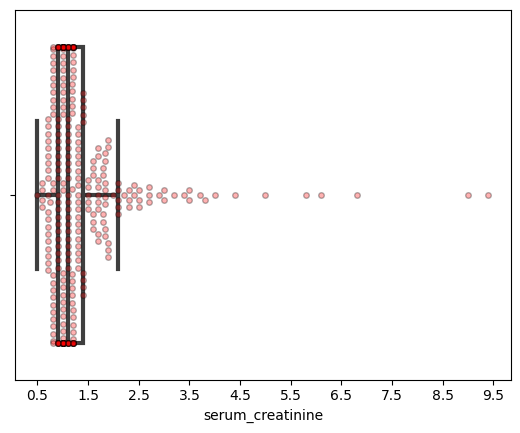

In [119]:
sns.boxplot(x=df['serum_creatinine'], showfliers=False, boxprops={'facecolor':'None'}, linewidth=3)
sns.swarmplot(x=df['serum_creatinine'], linewidth=1, edgecolor='black', color='red', s=4, marker='o', alpha=0.3)
plt.xticks(np.arange(min(df['serum_creatinine']), max(df['serum_creatinine'])+1, step=1))

plt.show()

In [120]:
df.describe()

,uniqueid,age,ejection_fraction,platelets,serum_sodium,serum_creatinine,creatinine_phosphokinase,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,149.000000,60.833893,38.083612,263358.029264,136.625418,1.39388,581.839465,130.260870
std,86.458082,11.894809,11.834841,97804.236869,4.412477,1.03451,970.287881,77.614208
min,0.000000,40.000000,14.000000,25100.000000,113.000000,0.50000,23.000000,4.000000
25%,74.500000,51.000000,30.000000,212500.000000,134.000000,0.90000,116.500000,73.000000
50%,149.000000,60.000000,38.000000,262000.000000,137.000000,1.10000,250.000000,115.000000
75%,223.500000,70.000000,45.000000,303500.000000,140.000000,1.40000,582.000000,203.000000
max,298.000000,95.000000,80.000000,850000.000000,148.000000,9.40000,7861.000000,285.000000


# Distribution analysis summary
- **Platelets**: 21 outliers. The lowest 7 entries range from 25k to 75k, which is physiologically possible but an indication of a potential medical condition. 5/7 suffer from diabetes, anemia, or both. All patients all 50 or older. Patient #281 is a smoker. The only patient who is not a smoker and does not have diabetes or anemia is patient #230, who passed away during follow up. Regarding the data above the outlier treshold, all values are within a range that is considered  thrombocytosis that does not require medical treatment (<1,500,000) as long as the patient is asymptomatic according to a scientific study published in the Pan African Medical Journal in [2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6607248/)). Every patient in this subset is either a smoker or suffering from diabetes and/or anemia. Outliers are unlikely to be mistakes.
- **Creatinine_phospokinase**: 29 outliers, all of which are above the outlier threshold. Data makes a relatively big jump between 2794 and 3964 mcg/L, but is otherwise evenly distributed. Gender also equally distributed. Most patients are over 60, but all age groups are represented. Smoking, diabetes, anemia, and high blood pressure are rare. Relatively little deaths. A scientific study published in the Cleveland Clinic of Journal of Medicine in [2016](https://www.ccjm.org/content/83/1/37) elucidated this seemingly odd phenomenon: misdiagnosis is common and the status quo is being tested. Even though this paper uses UI (International Unit), which cannot be directly translated to mcg/L, because it measures potency rather than blood levels, it does state that, on average, the upper limit should be twice as high. Additionally, it also states that CPK levels are highly dependent on race and gender. Exercise can temporarily increase CPK levels 30-fold, which can take up to a week to fully subside. Finally, the distribution of data collected on the blood levels of this enzyme tends to be non-Gaussian and negatively skewed. In conclusion, it is possible that this data is either an indication of a confounding factor (e.g., muscular dystrophy), that the patient recently did an intense workout, or that it is actually within a healthy range.
- **Serum_creatinine**: For the analaysis of this variable I opt a less research-oriented and a more analyist-approach. For this variable, 29 observations fall outside the maximum boxplot whisker-length 1.5 x IQR. As can be observed from the boxplot and the data generated by the outlier-script, IQR stretches between 1.0 and 1.5, whereas whisker length (1.5 x IQR both ways) is about 0.5 to 2.0. Everything from 2.2 and up is, mathemically speaking, an outlier. Based on the distribution I would suggest considering the number of data points to further research the values between 2.2 and 3.3 and remove everything from 3.4 (patient #129) and up.

## Cleaning part 2: removal of columns based on distribution analysis

In [121]:
# This code creates a new dataframe df_clean that includes only the observations that are within 1.5 x IQR for the 3 variables analyzed (228 rows, 71 observations removed)

df_clean = df[(df['platelets'] >= p_outlier_threshold[0]) &
              (df['platelets'] <= p_outlier_threshold[1]) &
              (df['creatinine_phosphokinase'] >= c_outlier_threshold[0]) &
              (df['creatinine_phosphokinase'] <= c_outlier_threshold[1]) &
              (df['serum_creatinine'] >= s_outlier_threshold[0]) &
              (df['serum_creatinine'] <= s_outlier_threshold[1])]

In [122]:
df_clean.shape

(228, 14)

## Notes on preceding cleaning operations
- All original **.csv** files can be generated at the beginning of this script.
- **df_merged** contains all columns from all datasets, merged on uniqueid, no further modifications made.
- **df** contains modified column names, datatypes, data, and reorganization, but still contains all observations.
- **df_clean** is **df** with all observations that fell outside the 1.5 x IQR range for the three variables analyzed removed.

# 5 Cross-Correlation Analysis

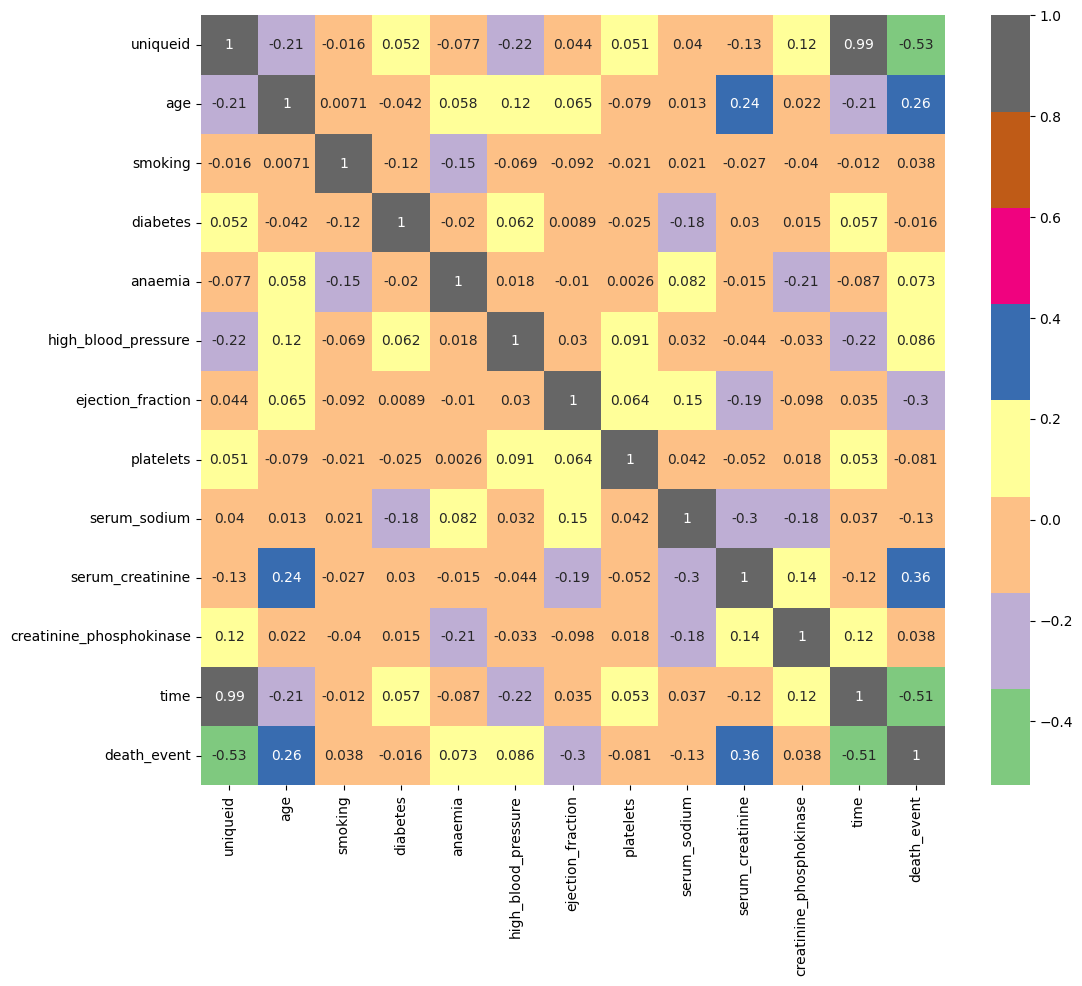

In [123]:
plt.subplots(figsize=(12, 10))
sns.heatmap(df_clean.corr(), cmap='Accent', annot=True)
plt.show()

# Cross-Correlation Analysis summary

## The classification according to Pearson's correlation coefficient (the CC used in the generation of this heatmap) is:
- 0.7 to 1.0: strong positive correlation
- 0.5 to 0.7: moderate positive correlation
- 0.3 to 0.5: weak positive correlation
- -0.7 to -0.5: moderate negative correlation
- -1.0 to -0.7: strong negative correlation

## Summary
- I will not discuss the correlations between _uniqueid_/_time_/_death_event_/itself for obvious reasons.
- The only category in this heatmap that is worth discussing is the indicated by dark blue: approximately between 0.2 and 4, although even the strongest correlations in this dataset is still only weak positive at best.
- The fact that there is a weak positive relationship between _serum_creatinine_, _age_ and _death_event_ is interesting although predictable: the probability of dying due to age is very weak, meaning that the probability of dying is determined by a complex interaction between multiple variables.
- The most interesting relationship in this dataset is the relational triangle between _age_, _serum_creatinine_, and _death_event_. _Serum_creatinine_ and age have the 3rd-strongest correlation (which is still considered "_no relationship_") in this dataset; apparently _serum_creatinine_ naturally goes up with age. The 2nd-strongest correlation, which falls within Pearson's definition of a "_weak positive relationship_", is between _serum_creatinine_ and _death_event_.
- In conclusion, according to this dataset, the factor that should lead the prognosis in heart failure is _serum creatinine_ levels.
- Important: this heatmap was generated using the clean dataset, meaning that all 29 outliers for _serum creatinine_ (which may or may not be incorrect measurements) were removed, meaning that the relationship might be stronger than the graph suggests.

# 6 Raising Data Questions
These questions are (to some extent) derived from the results of my Tableau analysis.

1. **Is creatinine_phosphokinase affected by smoking**: Yes, smoking increases creatinine_phosphokinase.
2. **Is platelet count correlated with behavior or demographics**: there is a noticable correlation between gender and platelet count, which is further aggrevated by smoking
3. **How does smoking affect survival rate** survival for _nonsmokers_ ends at age 84, surival for **smokers** at 94.
4. **How does _gender_ affect survival rate for patients with high blood pressure**: Women with high blood pressure are significantly less likely to survive heart failure.
5. **How is the _ejection_fraction_ of heart failure patients compared to healthy individual:** It appears that people who experience heart failure on average have a lower _ejection_fraction_
6. **What is the most significant column impacting the phenomena in my dataset**: The most significant biomarker for heart failure is _serum_creatinine_ levels (which persists even after removal of outliers, which might be real data)

# 7 Data Enrichment
- Investigate the _serum_creatinine_ phenomenon, including the probability that the outliers are indeed outliers.
- Create a binned ordinal variable for exercise and a boolean variable for preferred type of excercise (resistance/cardio).
- Have patients wear sleep trackers to measure sleep quality and length.
- Diet analysis based on macromolecule distribution.